In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from math import sqrt

df = pd.read_csv("Air_Quality_Measures_predictive dataset project.csv")
df.head()

,MeasureId,MeasureName,MeasureType,StratificationLevel,StateFips,StateName,CountyFips,CountyName,ReportYear,Value,Unit,UnitName,DataOrigin,MonitorOnly
0,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1027,Clay,1999,33.0,No Units,No Units,Monitor Only,1
1,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1051,Elmore,1999,5.0,No Units,No Units,Monitor Only,1
2,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1073,Jefferson,1999,39.0,No Units,No Units,Monitor Only,1
3,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1079,Lawrence,1999,28.0,No Units,No Units,Monitor Only,1
4,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1,Alabama,1089,Madison,1999,31.0,No Units,No Units,Monitor Only,1


In [3]:
df.info()
df.describe()

df.isnull().sum()

df = df.dropna()  # simple cleaning; can use imputation depending on project requirement
df = df.select_dtypes(include=[np.number])  # keeping numerical columns for ML tasks
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218635 entries, 0 to 218634
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   MeasureId            218635 non-null  int64  
 1   MeasureName          218635 non-null  object 
 2   MeasureType          218635 non-null  object 
 3   StratificationLevel  218635 non-null  object 
 4   StateFips            218635 non-null  int64  
 5   StateName            218635 non-null  object 
 6   CountyFips           218635 non-null  int64  
 7   CountyName           218635 non-null  object 
 8   ReportYear           218635 non-null  int64  
 9   Value                218635 non-null  float64
 10  Unit                 218635 non-null  object 
 11  UnitName             218635 non-null  object 
 12  DataOrigin           218635 non-null  object 
 13  MonitorOnly          218635 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 23.4+ MB


,MeasureId,StateFips,CountyFips,ReportYear,Value,MonitorOnly
0,83,1,1027,1999,33.0,1
1,83,1,1051,1999,5.0,1
2,83,1,1073,1999,39.0,1
3,83,1,1079,1999,28.0,1
4,83,1,1089,1999,31.0,1


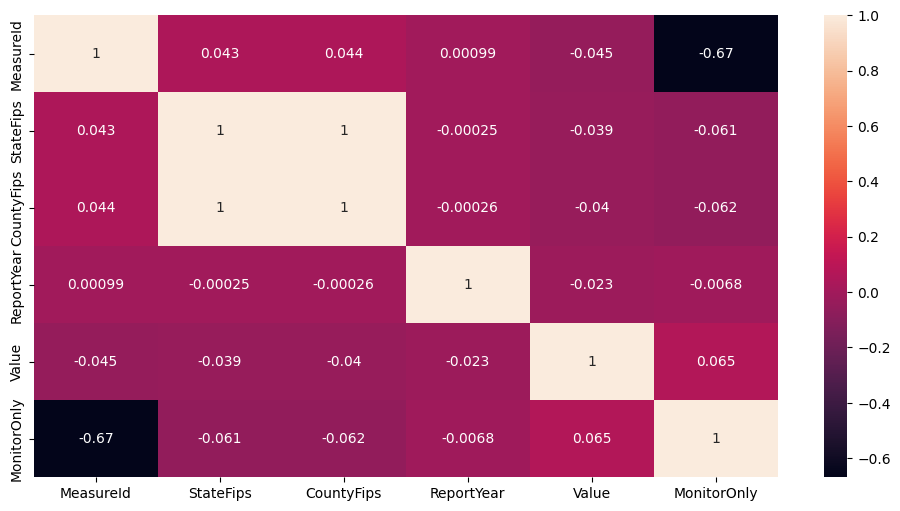

In [4]:
#exploring trends and relationships visually
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

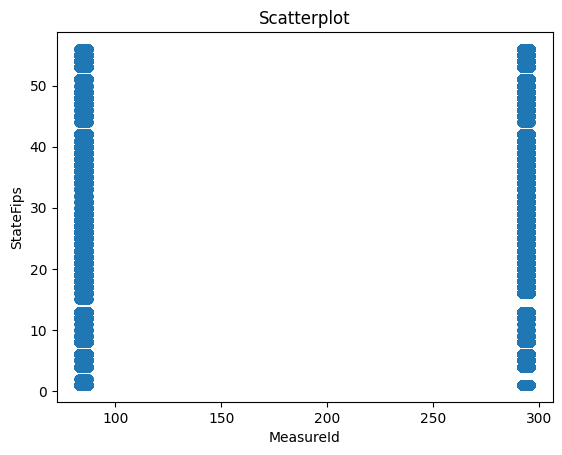

In [5]:
#Scatterplot (example: AQI vs PM2.5)
plt.scatter(df.iloc[:,0], df.iloc[:,1])
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.title("Scatterplot")
plt.show()

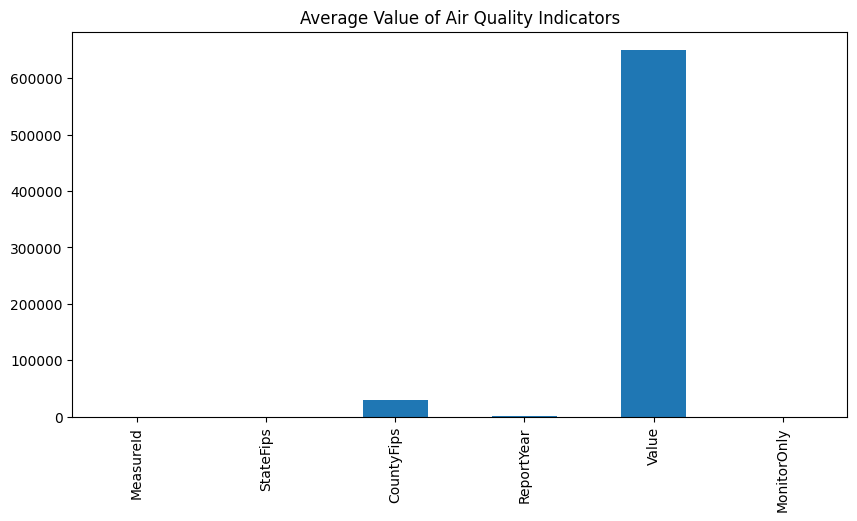

In [6]:
df.mean().plot(kind="bar", figsize=(10,5))
plt.title("Average Value of Air Quality Indicators")
plt.show()

In [10]:
#predicting a continuous air-quality feature(Simple / Multiple Linear Regression)
target = df.columns[0] 
X = df.drop(columns=[target])
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [11]:
#Regression Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae, mse, rmse, r2

(40.03365879387569, 4104.011670181831, 64.06256059651245, 0.4477552048557686)

In [13]:
#turning numeric air quality data into categories for ML classification
df["Pollution_Class"] = (df[target] > df[target].median()).astype(int)
X = df.drop(columns=["Pollution_Class"])
y = df["Pollution_Class"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

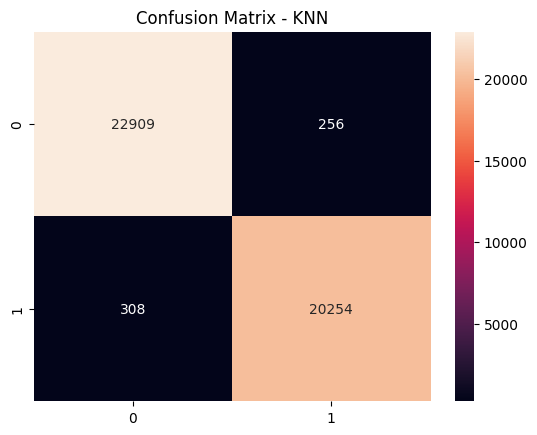

In [16]:
#lazy learning method to classify air quality levels
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
acc = accuracy_score(y_test, knn_pred)
prec = precision_score(y_test, knn_pred)
rec = recall_score(y_test, knn_pred)
f1 = f1_score(y_test, knn_pred)
acc, prec, rec, f1
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, fmt="d")
plt.title("Confusion Matrix - KNN")
plt.show()

In [17]:
#applying a probabilistic classifier
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train, y_train)
log_pred = logreg.predict(X_test)
accuracy_score(y_test, log_pred)

0.9999542616689917

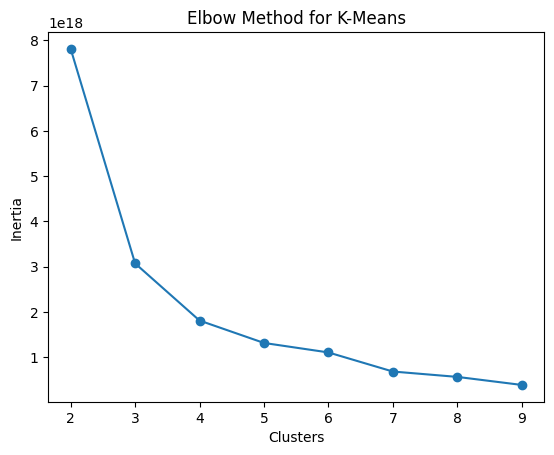

In [18]:
#K-Means Clustering(grouping similar air quality measurements without labels)
inertia_values = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia_values.append(km.inertia_)
plt.plot(range(2,10), inertia_values, marker='o')
plt.title("Elbow Method for K-Means")
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.show()

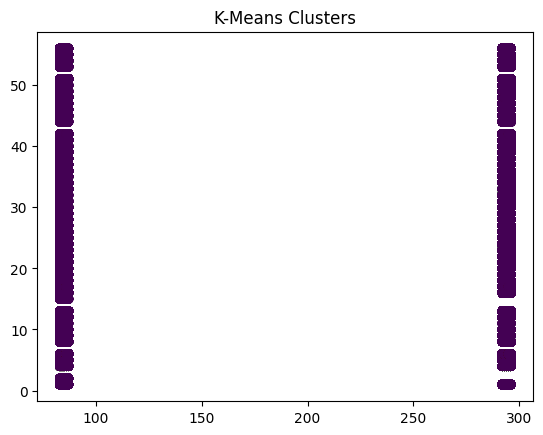

In [20]:
#Run K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)
df["Cluster"] = clusters
df["Cluster"].value_counts()
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=df["Cluster"])
plt.title("K-Means Clusters")
plt.show()